## Step 1: Business Understanding

### Goal of Analysis
Understand customer purchasing behavior to identify **top-selling products, key customer segments, and seasonal trends**.

### How This Helps the Business
1️ **Find high-value customers** for loyalty programs.  
2️ **Identify best-selling products** to optimize inventory.  
3️ **Detect seasonal trends** for better stock and marketing planning.  
4️ **Provide data-driven strategies** to **boost sales** and **customer retention**.  

### Expected Insights
 **Top Products**: Which items generate the most revenue?  
 **Customer Segmentation**: Who are the most valuable customers?  
 **Sales Trends**: Are there seasonal buying patterns?  
 **Business Growth Strategies**: How can sales and retention improve?  

### Key Stakeholders
 **Marketing Team** → For better promotions.  
 **Sales Team** → To focus on top customers.  
 **Inventory Team** → To optimize stock levels.  
 **Management** → To make informed strategic decisions.  


## Step 2: Data Collection & Loading

In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv("data.csv", encoding='ISO-8859-1')

In [3]:
# Display the first 5 rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Step 3: Data Cleaning & Preprocessing

<h4> 3.1 Check for Missing Values

In [4]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<h4>3.2 Handle Missing Values

In [5]:
df = df.dropna(subset=['CustomerID'])

In [6]:
df = df.dropna(subset=['Description'])

In [7]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

<h4>3.3  Remove Duplicates

In [8]:
# Remove duplicate rows
df = df.drop_duplicates()

<h4>3.4 Convert Data Types

In [9]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [10]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [11]:
df["CustomerID"] = df["CustomerID"].astype(int)

In [12]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int32
Country                object
dtype: object

<h4>3.5 Remove invalid Transactions

In [13]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]     #to remove rows where Quantity and unitprice are negative

In [14]:
print(df[df['Quantity'] <= 0])   # Should return an empty DataFrame  
print(df[df['UnitPrice'] <= 0])  # Should return an empty DataFrame  

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []


## Step 4: Exploratory Data Analysis (EDA)

<h4>4.1 Basic Statistical Summary

In [15]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


<h4> 4.2 Top-Selling Products

In [16]:
top_products = df.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)
print(top_products)

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
ASSORTED COLOUR BIRD ORNAMENT         35263
PACK OF 72 RETROSPOT CAKE CASES       33670
POPCORN HOLDER                        30919
RABBIT NIGHT LIGHT                    27153
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64


<h4>4.3 Total Revenue by Country

In [17]:
df["Revenue"] = df["Quantity"] * df["UnitPrice"]

revenue_by_country = df.groupby("Country")["Revenue"].sum().sort_values(ascending=False)
print(revenue_by_country.head(10))  # Top 10 countries by revenue

Country
United Kingdom    7285024.644
Netherlands        285446.340
EIRE               265262.460
Germany            228678.400
France             208934.310
Australia          138453.810
Spain               61558.560
Switzerland         56443.950
Belgium             41196.340
Sweden              38367.830
Name: Revenue, dtype: float64


<h4>4.4 Monthly Sales Trend

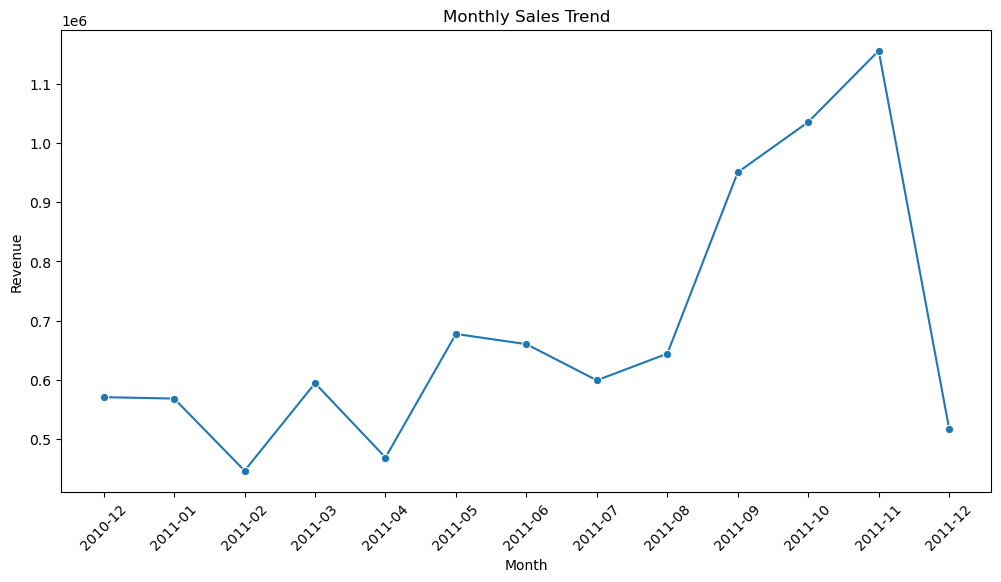

In [18]:
df["InvoiceMonth"] = df["InvoiceDate"].dt.to_period("M")

monthly_sales = df.groupby("InvoiceMonth")["Revenue"].sum()

plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values, marker="o")
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

<h4> 4.5 Top 10 Customers by Revenue (Bar Chart)

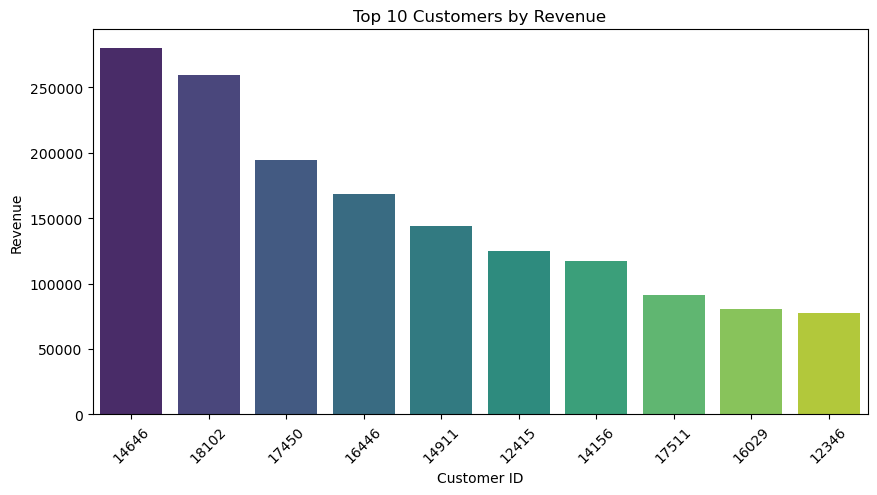

In [19]:
# Top 10 customers by revenue
top_customers = df.groupby("CustomerID")["Revenue"].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_customers.index.astype(str), y=top_customers.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 Customers by Revenue")
plt.xlabel("Customer ID")
plt.ylabel("Revenue")
plt.show()

<h4> 4.6 Sales Distribution by Weekday (Bar Chart)

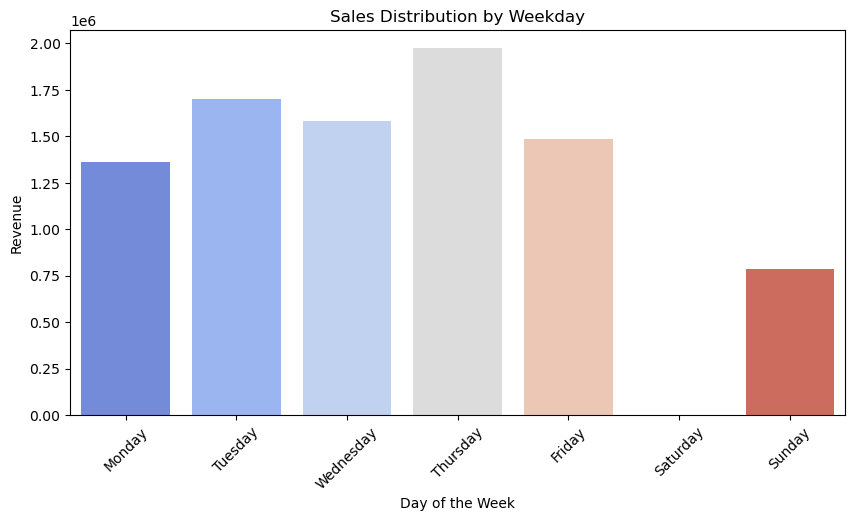

In [20]:
df["Weekday"] = df["InvoiceDate"].dt.day_name()
weekday_sales = df.groupby("Weekday")["Revenue"].sum().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Sales Distribution by Weekday")
plt.xlabel("Day of the Week")
plt.ylabel("Revenue")
plt.show()

In [21]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])  # Ensure it's in datetime format
df['Weekday'] = df['InvoiceDate'].dt.day_name()  # Extract day names

# Check if there are any transactions on Saturdays
saturday_sales = df[df['Weekday'] == 'Saturday']

if saturday_sales.empty:
    print("No sales data for Saturdays.")
else:
    print(f"Total transactions on Saturdays: {len(saturday_sales)}")
    print(saturday_sales[['InvoiceNo', 'CustomerID', 'Revenue']].head())


No sales data for Saturdays.


In [22]:
saturday_revenue = df[df['Weekday'] == 'Saturday']['Revenue'].sum()
print(f"Total revenue on Saturdays: {saturday_revenue}")

Total revenue on Saturdays: 0.0


<h4>4.7 Most Frequently Purchased Products

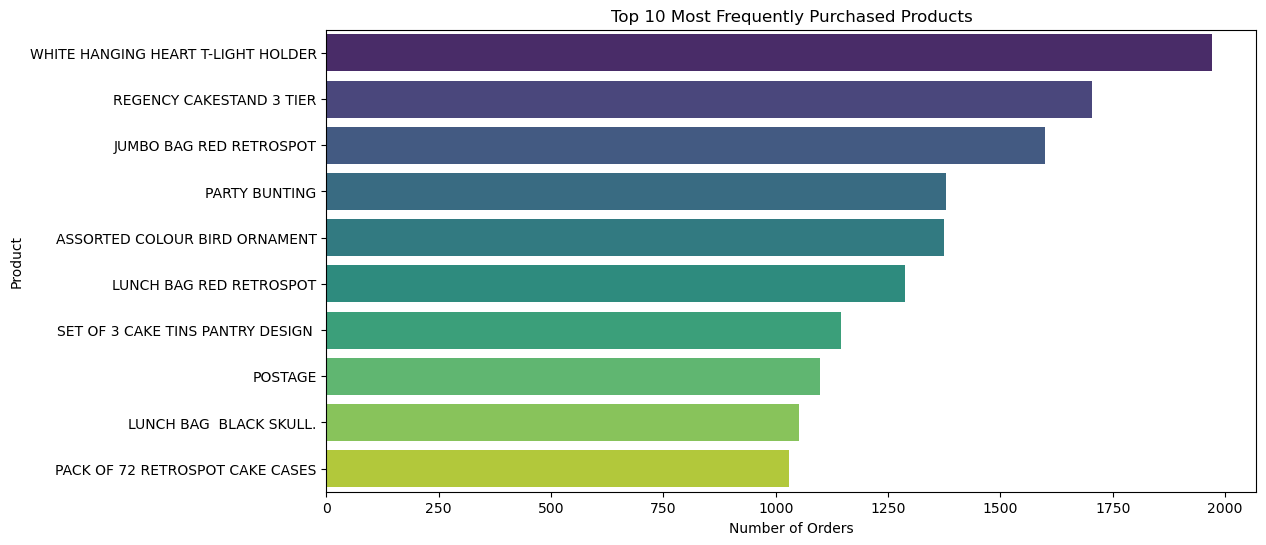

In [31]:
# Count the number of orders each product appears in
most_frequent_products = df.groupby('Description')['InvoiceNo'].nunique().sort_values(ascending=False).head(10)

# Plot the most frequently purchased products
plt.figure(figsize=(12, 6))
sns.barplot(x=most_frequent_products.values, y=most_frequent_products.index, palette='viridis')
plt.xlabel("Number of Orders")
plt.ylabel("Product")
plt.title("Top 10 Most Frequently Purchased Products")
plt.show()

<h4>4.8 Average Quantity Purchased per Order

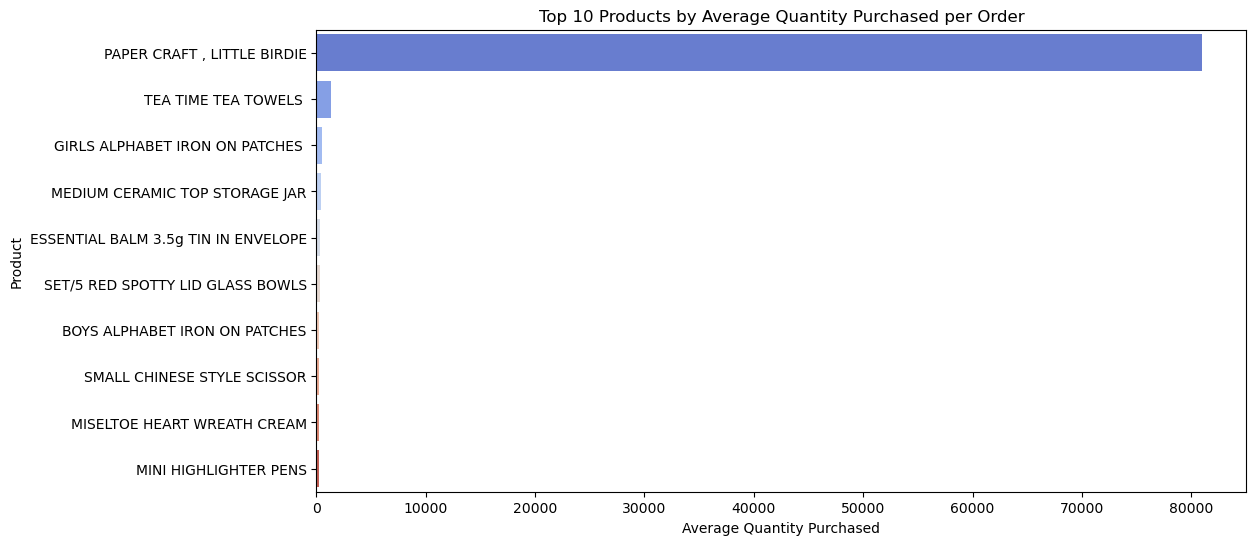

In [33]:
# Calculate average quantity purchased per order for each product
avg_quantity_per_order = df.groupby('Description')['Quantity'].mean().sort_values(ascending=False).head(10)

# Plot the average quantity per order
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_quantity_per_order.values, y=avg_quantity_per_order.index, palette='coolwarm')
plt.xlabel("Average Quantity Purchased")
plt.ylabel("Product")
plt.title("Top 10 Products by Average Quantity Purchased per Order")
plt.show()

## Step 5: Customer Segmentation & Insights

<h4> 5.1 Compute RFM Metrics

In [24]:
import datetime as dt

# Define reference date (one day after the latest transaction)
reference_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

# Compute RFM Metrics
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'count',  # Frequency
    'Revenue': 'sum'  # Monetary
}).reset_index()

# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12347,2,182,4310.00
2,12348,75,31,1797.24
3,12349,19,73,1757.55
4,12350,310,17,334.40


<h4>5.2 Assign RFM Scores

In [25]:
# Assign scores using quantiles (1 = lowest, 5 = highest)
rfm['RecencyScore'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['FrequencyScore'] = pd.qcut(rfm['Frequency'], 5, labels=[1, 2, 3, 4, 5])
rfm['MonetaryScore'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# Combine into a single RFM score
rfm['RFM_Score'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str) + rfm['MonetaryScore'].astype(str)

rfm.head()

,CustomerID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score
0,12346,326,1,77183.60,1,1,5,115
1,12347,2,182,4310.00,5,5,5,555
2,12348,75,31,1797.24,2,3,4,234
3,12349,19,73,1757.55,4,4,4,444
4,12350,310,17,334.40,1,2,2,122


<h4>5.3 Define Customer Segments

In [26]:
# Function to assign customer segments based on RFM Score
def segment_customer(row):
    if row['RFM_Score'] in ['555', '554', '545', '544']:
        return 'Champion'
    elif row['RFM_Score'] in ['543', '535', '534']:
        return 'Loyal Customer'
    elif row['RFM_Score'] in ['533', '525', '524']:
        return 'Potential Loyalist'
    elif row['RFM_Score'] in ['515', '514', '435']:
        return 'At Risk'
    else:
        return 'Lost Customer'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)

rfm.head()

,CustomerID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Segment
0,12346,326,1,77183.60,1,1,5,115,Lost Customer
1,12347,2,182,4310.00,5,5,5,555,Champion
2,12348,75,31,1797.24,2,3,4,234,Lost Customer
3,12349,19,73,1757.55,4,4,4,444,Lost Customer
4,12350,310,17,334.40,1,2,2,122,Lost Customer


<h4> 5.4 Summary of Customer Segments

In [27]:
# Count customers in each segment
segment_counts = rfm['Segment'].value_counts()

# Display summary
print(segment_counts)

Lost Customer         3643
Champion               534
Loyal Customer          76
Potential Loyalist      71
At Risk                 14
Name: Segment, dtype: int64


<h4>5.5 Visualizing Customer Segments

Bar Plot - Customer Segment Distribution

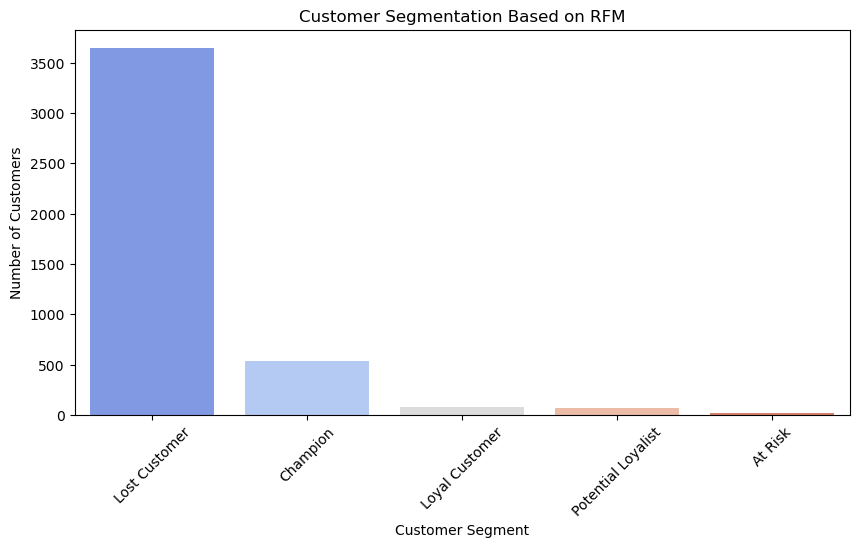

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='coolwarm')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.title('Customer Segmentation Based on RFM')
plt.xticks(rotation=45)
plt.show()

Scatter Plot - Frequency vs. Monetary Value

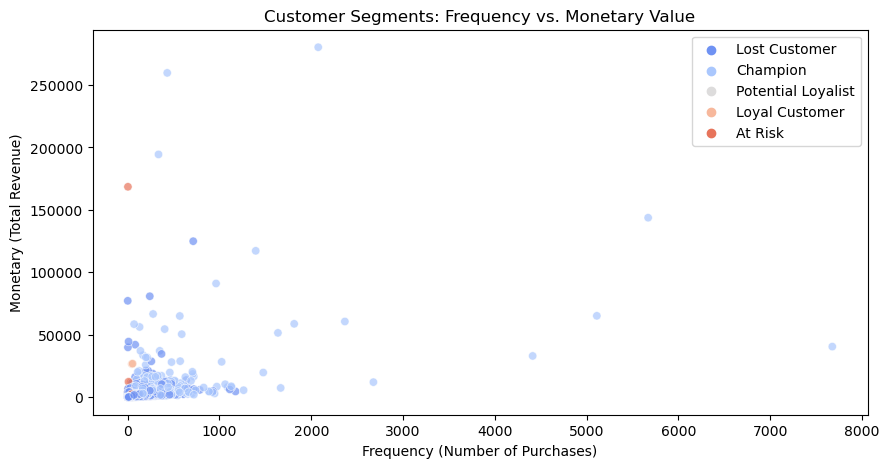

In [29]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Segment', palette='coolwarm', alpha=0.7)
plt.xlabel('Frequency (Number of Purchases)')
plt.ylabel('Monetary (Total Revenue)')
plt.title('Customer Segments: Frequency vs. Monetary Value')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

## Step 6 : Business Insights & Recommendations

### 6.1 Customer Segmentation Insights & Recommendations

### Insights:
- The majority of customers (**3,643**) fall into the **"Lost Customer"** category, meaning they haven't made a purchase in a long time.
- A relatively small number of customers are:
  - **"Champions" (534)** – frequent purchasers with high revenue.
  - **"Loyal Customers" (76)** – repeat buyers contributing consistently.
  - **"Potential Loyalists" (71)** – customers who could become long-term buyers with proper engagement.
  - **"At Risk" (14)** – previously engaged customers now showing signs of inactivity.

### Recommendations:
- **Re-engage Lost Customers** with:
  - Personalized emails and reminders.
  - Discounts and remarketing campaigns to bring them back.
- **Strengthen relationships with Champions and Loyal Customers** by:
  - Offering exclusive perks and loyalty rewards.
  - Providing early access to new products.
- **Convert Potential Loyalists into repeat buyers** by:
  - Using personalized product recommendations.
  - Targeted incentives to encourage frequent purchases.
- **Prevent At-Risk customers from churning** with:
  - Special retention offers.
  - Re-engagement campaigns tailored to their interests.

### 6.2 Product Purchase Behavior Insights & Recommendations

### Insights:
- **Sales by Weekday:** Thursday has the highest revenue, while Sunday sees the lowest sales.
- **Monthly Sales Trend:** Sales peak in November but drop sharply in December.
- **Top-Selling Products:** DIY crafts, home decor, and novelty items drive the highest sales.

### Recommendations:
- **Increase Sunday Sales:** Offer discounts or promotions to boost revenue on low-sales days.
- **Optimize Inventory for Peak Months:** Stock up before November and run clearance sales in December.
- **Expand Best-Selling Categories:** Focus on DIY, home decor, and novelty items while exploring new markets.


### 6.3 Country-wise Revenue Insights & Recommendations

### Insights:
- **United Kingdom dominates sales**, contributing the highest revenue.
- **Netherlands, Ireland, Germany, and France** are key international markets with significant revenue.
- **Other countries** (Australia, Spain, Switzerland, Belgium, Sweden) contribute less but still hold potential for growth.

### Recommendations:
- **Strengthen UK market leadership** with exclusive promotions and personalized marketing.
- **Expand in top international markets** by localizing marketing strategies and offering region-specific discounts.
- **Grow smaller markets** through targeted advertising and partnerships with local distributors.


### 6.4 Customer Retention & Churn Reduction Insights & Recommendations

### Insights:
- A **high number of customers (Lost Customers: 3,643)** have stopped purchasing, indicating retention challenges.
- **Only a small percentage of customers (Loyal Customers: 76, Potential Loyalists: 71)** make frequent purchases.
- **At-Risk customers (14)** show signs of churning, requiring immediate intervention.

### Recommendations:
- **Reduce churn by re-engaging lost customers** with personalized discounts, emails, and targeted ads.
- **Encourage repeat purchases** through loyalty programs, exclusive offers, and early product access.
- **Identify at-risk customers early** and offer tailored retention deals to bring them back.
